# Soccer Quality of Countries
## Measured by average goals per game and goals per country


 ### Import the useful packages, and make sure that matplot lib can show in the notebook

In [18]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Create connections to the database, and use SQL to retrieve the desired data.

In [19]:

cnx = sqlite3.connect('database.sqlite')
#player_at = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
#player = pd.read_sql_query("SELECT * FROM Player", cnx)
#league = pd.read_sql_query("SELECT * FROM League", cnx)
team = pd.read_sql_query("SELECT * FROM Team", cnx)
country= pd.read_sql_query("SELECT * FROM Country", cnx)
match= pd.read_sql_query("SELECT * FROM Match", cnx)

### rename the columns to be the merge columns, for simplicity

In [20]:
country['country_id'] = country['id']
country['country_name'] = country['name']
country = country.drop(columns=['name','id'])

### Filter the datasets to only the desired data

In [21]:
match_filtered = match[['country_id', 'league_id','home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]
team_filtered = team[['team_api_id', 'team_long_name']]

### Show the table

In [22]:
match_filtered.head()

,country_id,league_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,9987,9993,1,1
1,1,1,10000,9994,0,0
2,1,1,9984,8635,0,3
3,1,1,9991,9998,5,0
4,1,1,7947,9985,1,3


### Get country and league information, place them into the desired dataframe (soccer_data)

In [23]:
soccer_data = match_filtered.merge(country, on='country_id', how='inner')
soccer_data = soccer_data.merge(league, left_on='league_id', right_on='id', how='inner')
soccer_data = soccer_data.merge(team_filtered, left_on='home_team_api_id', right_on='team_api_id', how='inner')
soccer_data = soccer_data.rename(columns={"team_long_name": "home_team"})
soccer_data = soccer_data.merge(team_filtered, left_on='away_team_api_id', right_on='team_api_id', how='inner')
soccer_data = soccer_data.rename(columns={"team_long_name": "away_team", "name":"league_name"})
soccer_data = soccer_data[['country_name', 'league_name', 'home_team', 'home_team_goal', 'away_team', 'away_team_goal']]

### Fill in the 'Total Goals' per game by adding the home and away goals

In [24]:
soccer_data['total_goals'] = soccer_data['home_team_goal'] + soccer_data['away_team_goal']
soccer_data.head()

,country_name,league_name,home_team,home_team_goal,away_team,away_team_goal,total_goals
0,Belgium,Belgium Jupiler League,KRC Genk,1,Beerschot AC,1,2
1,Belgium,Belgium Jupiler League,KRC Genk,1,Beerschot AC,1,2
2,Belgium,Belgium Jupiler League,KRC Genk,2,Beerschot AC,1,3
3,Belgium,Belgium Jupiler League,KRC Genk,3,Beerschot AC,1,4
4,Belgium,Belgium Jupiler League,KRC Genk,3,Beerschot AC,0,3


## Time to plot!

### First, group the data by country_name
### Next, show the description of the data, sorted by highest mean first

In [25]:
country_data = soccer_data.groupby('country_name')
country_total_goals = country_data['total_goals'].describe(percentiles=[.95,.75])
country_total_goals.sort_values(by=['mean'], ascending=False)

,count,mean,std,min,50%,75%,95%,max
country_name,,,,,,,,
Netherlands,2448.0,3.080882,1.740640,0.0,3.0,4.0,6.0,10.0
Switzerland,1422.0,2.929677,1.717765,0.0,3.0,4.0,6.0,9.0
Germany,2448.0,2.901552,1.704974,0.0,3.0,4.0,6.0,11.0
Belgium,1728.0,2.801505,1.656507,0.0,3.0,4.0,6.0,9.0
Spain,3040.0,2.767105,1.731111,0.0,3.0,4.0,6.0,12.0
England,3040.0,2.710526,1.691127,0.0,3.0,4.0,6.0,10.0
Scotland,1824.0,2.633772,1.644379,0.0,2.0,4.0,6.0,12.0
Italy,3017.0,2.616838,1.640327,0.0,2.0,4.0,6.0,9.0
Portugal,2052.0,2.534600,1.637348,0.0,2.0,4.0,5.0,9.0


### Show the table, this time being sorted by highest count first

In [26]:
country_total_goals.sort_values(by=['count'], ascending=False)

,count,mean,std,min,50%,75%,95%,max
country_name,,,,,,,,
England,3040.0,2.710526,1.691127,0.0,3.0,4.0,6.0,10.0
France,3040.0,2.443092,1.551799,0.0,2.0,3.0,5.0,10.0
Spain,3040.0,2.767105,1.731111,0.0,3.0,4.0,6.0,12.0
Italy,3017.0,2.616838,1.640327,0.0,2.0,4.0,6.0,9.0
Germany,2448.0,2.901552,1.704974,0.0,3.0,4.0,6.0,11.0
Netherlands,2448.0,3.080882,1.740640,0.0,3.0,4.0,6.0,10.0
Portugal,2052.0,2.534600,1.637348,0.0,2.0,4.0,5.0,9.0
Poland,1920.0,2.425000,1.540355,0.0,2.0,3.0,5.0,8.0
Scotland,1824.0,2.633772,1.644379,0.0,2.0,4.0,6.0,12.0


### Plot the Average Goals by Country

(0, 4)

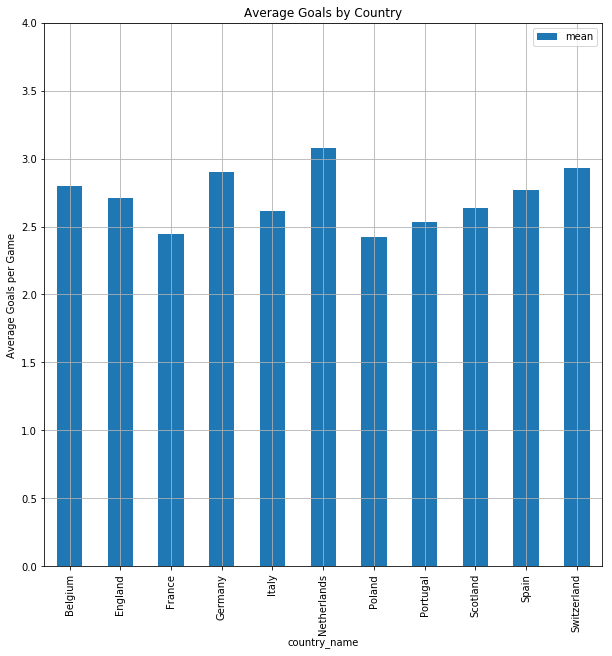

In [27]:
ax = country_total_goals.plot.bar(y='mean', figsize=(10,10))
ax.grid()
ax.set_ylabel('Average Goals per Game')
ax.set_title('Average Goals by Country')
ax.set_ylim(0,4)

### Plot the Total Goals by Country

(0, 4000)

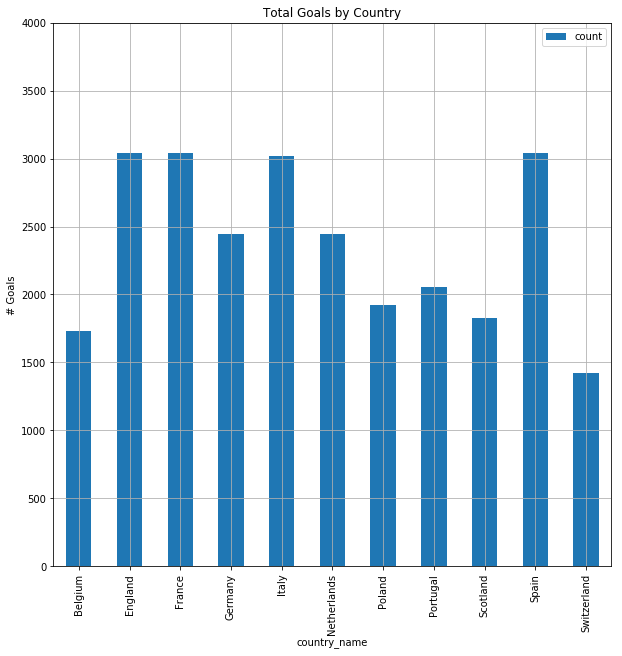

In [28]:
ax = country_total_goals.plot.bar(y='count', figsize=(10,10))
ax.grid()
ax.set_ylabel('# Goals')
ax.set_title('Total Goals by Country')
ax.set_ylim(0,4000)